In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import os
import cv2
from PIL import Image
from math import floor, ceil, pi
from glob import glob                                                           

In [2]:
images_train = glob('im_base_to_angle/started_state/train/*.bmp')
images_test = glob('im_base_to_angle/started_state/test/*.jpg')
images_val = glob('im_base_to_angle/started_state/val/*.bmp')

def convert_image_format(images_folder, needed_format):
    images = glob(images_folder)
    for j in images:
        img = cv2.imread(j)
        cv2.imwrite(j[:-3] + needed_format, img)
        
# convert_image_format('im_base_to_angle/started_state/val/*.bmp', 'png')
# print(images)

In [3]:
img = matplotlib.pyplot.imread('im_base_to_angle/started_state/train/19.png')
# tf_img = tf.convert_to_tensor(img)
resized_images=tf.image.resize_images(img, [600, 600])
print(resized_images)

Tensor("resize_images/Squeeze:0", shape=(600, 600, 3), dtype=float32)


In [4]:
def get_image_paths(folder):
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

In [5]:
X_img_paths = get_image_paths('im_base_to_angle/started_state/train')
print(X_img_paths)

['im_base_to_angle/started_state/train/109.png', 'im_base_to_angle/started_state/train/118.png', 'im_base_to_angle/started_state/train/126.png', 'im_base_to_angle/started_state/train/134.png', 'im_base_to_angle/started_state/train/138.png', 'im_base_to_angle/started_state/train/144.png', 'im_base_to_angle/started_state/train/152.png', 'im_base_to_angle/started_state/train/159.png', 'im_base_to_angle/started_state/train/162.png', 'im_base_to_angle/started_state/train/175.png', 'im_base_to_angle/started_state/train/176.png', 'im_base_to_angle/started_state/train/19.png', 'im_base_to_angle/started_state/train/25.png', 'im_base_to_angle/started_state/train/34.png', 'im_base_to_angle/started_state/train/38.png', 'im_base_to_angle/started_state/train/43.png', 'im_base_to_angle/started_state/train/52.png', 'im_base_to_angle/started_state/train/53.png', 'im_base_to_angle/started_state/train/64.png', 'im_base_to_angle/started_state/train/66.png']


In [6]:
IMAGE_SIZE = 600

def tf_resize_images(X_img_file_paths):
    X_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        for index, file_path in enumerate(X_img_file_paths):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data

In [7]:
X_imgs = tf_resize_images(X_img_paths)
print(X_imgs.shape)

(20, 600, 600, 3)


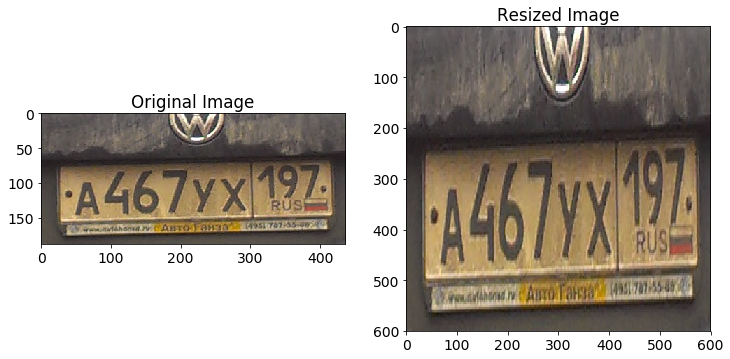

In [8]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread(X_img_paths[0])[:,:,:3])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(X_imgs[0])
plt.title('Resized Image')
plt.show()
# cv2.imwrite('test.png',X_imgs[0])
# print(X_imgs[0])
# im = Image.fromarray(np.squeeze(X_imgs[0]) * 255).astype('uint8').convert("RGB")
# im.save("your_file.jpeg")

In [10]:
X_imgs[0].dtype = np.uint8
print(X_imgs[0])
# im = Image.fromarray(data, mode = 'RGB')

[[[0.35686275 0.34117648 0.34509805]
  [0.35686275 0.34117648 0.34509805]
  [0.3529412  0.3372549  0.34117648]
  ...
  [0.45882353 0.4392157  0.42745098]
  [0.45490196 0.43529412 0.42352942]
  [0.45490196 0.43529412 0.42352942]]

 [[0.35686275 0.34117648 0.34509805]
  [0.35686275 0.34117648 0.34509805]
  [0.3529412  0.3372549  0.34117648]
  ...
  [0.45882353 0.4392157  0.42745098]
  [0.45490196 0.43529412 0.42352942]
  [0.45490196 0.43529412 0.42352942]]

 [[0.35686275 0.34117648 0.34509805]
  [0.35686275 0.34117648 0.34509805]
  [0.3529412  0.3372549  0.34117648]
  ...
  [0.45882353 0.4392157  0.42745098]
  [0.45490196 0.43529412 0.42352942]
  [0.45490196 0.43529412 0.42352942]]

 ...

 [[0.37254903 0.34117648 0.33333334]
  [0.37254903 0.34117648 0.33333334]
  [0.35686275 0.3372549  0.32156864]
  ...
  [0.38039216 0.37254903 0.3764706 ]
  [0.39215687 0.38431373 0.3882353 ]
  [0.40784314 0.4        0.40392157]]

 [[0.37254903 0.34117648 0.33333334]
  [0.37254903 0.34117648 0.33333334]


In [ ]:
for idx, each_img in enumerate(X_img_paths):
    img = cv2.imread(each_img, cv2.IMREAD_UNCHANGED)
    print(f'Original Dimensions : {img.shape} and idx = {idx + 1}')
    
    width = 450
    height = 450
    dim = (width, height)

    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    print('Resized Dimensions : ',resized.shape)

#     cv2.imshow("Resized image", resized)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

#     cv2.imwrite(f'im_base_to_angle/resized/train/{idx + 1}_resized.png', resized)


In [12]:
def rotate_images(X_imgs, start_angle, end_angle, n_images):
    X_rotate = []
    iterate_at = (end_angle - start_angle) / (n_images - 1)
    
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
    radian = tf.placeholder(tf.float32, shape = (len(X_imgs)))
    tf_img = tf.contrib.image.rotate(X, radian)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        for index in range(n_images):
            degrees_angle = start_angle + index * iterate_at
            radian_value = degrees_angle * pi / 180  # Convert to radian
            radian_arr = [radian_value] * len(X_imgs)
            rotated_imgs = sess.run(tf_img, feed_dict = {X: X_imgs, radian: radian_arr})
            X_rotate.extend(rotated_imgs)

    X_rotate = np.array(X_rotate, dtype = np.float32)
    return X_rotate

In [13]:
# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images
rotated_imgs = rotate_images(X_imgs, -90, 90, 14)
print(rotated_imgs.shape)

(280, 600, 600, 3)


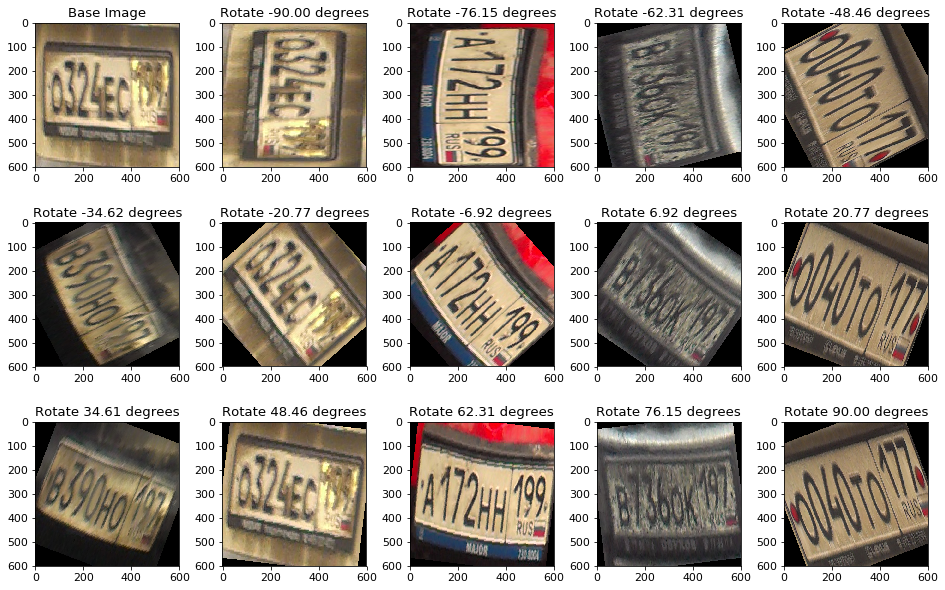

In [14]:
matplotlib.rcParams.update({'font.size': 11})

fig, ax = plt.subplots(figsize = (16, 11))
gs = gridspec.GridSpec(3, 5)
gs.update(wspace = 0.30, hspace = 0.0002)

plt.subplot(gs[0])
plt.imshow(X_imgs[5])
plt.title('Base Image')

for i in range(14):
    plt.subplot(gs[i + 1])
    plt.imshow(rotated_imgs[5 + 12 * i])
    plt.title('Rotate {:.2f} degrees'.format(-90 + 13.846 * i))
plt.show()

In [15]:
X_img_paths_resized = get_image_paths('im_base_to_angle/resized/train')
print(X_img_paths_resized)

['im_base_to_angle/resized/train/10_resized.png', 'im_base_to_angle/resized/train/11_resized.png', 'im_base_to_angle/resized/train/12_resized.png', 'im_base_to_angle/resized/train/13_resized.png', 'im_base_to_angle/resized/train/14_resized.png', 'im_base_to_angle/resized/train/15_resized.png', 'im_base_to_angle/resized/train/16_resized.png', 'im_base_to_angle/resized/train/17_resized.png', 'im_base_to_angle/resized/train/18_resized.png', 'im_base_to_angle/resized/train/19_resized.png', 'im_base_to_angle/resized/train/1_resized.png', 'im_base_to_angle/resized/train/20_resized.png', 'im_base_to_angle/resized/train/2_resized.png', 'im_base_to_angle/resized/train/3_resized.png', 'im_base_to_angle/resized/train/4_resized.png', 'im_base_to_angle/resized/train/5_resized.png', 'im_base_to_angle/resized/train/6_resized.png', 'im_base_to_angle/resized/train/7_resized.png', 'im_base_to_angle/resized/train/8_resized.png', 'im_base_to_angle/resized/train/9_resized.png']


In [ ]:
for idx, each_img in enumerate(X_img_paths_resized):
    img = cv2.imread(each_img, cv2.IMREAD_UNCHANGED)
    # get image height, width
    (h, w) = img.shape[:2]
    # calculate the center of the image
    center = (w / 2, h / 2)
    
    scale = 1.0
    
    for i in range(1, 361):
        M = cv2.getRotationMatrix2D(center, i, scale)
        rotated = cv2.warpAffine(img, M, (h, w))
        cv2.imshow('Original Image',rotated)
        cv2.waitKey(0) # waits until a key is pressed
        cv2.destroyAllWindows() # destroys the window showing image

#     cv2.imshow("Resized image", resized)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

#     cv2.imwrite(f'im_base_to_angle/resized/train/{idx + 1}_resized.png', resized)